<a href="https://colab.research.google.com/github/Elwing-Chou/kmu1202/blob/main/3_tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease
import urllib.request as req
url = "https://github.com/Elwing-Chou/kmu1202/raw/main/kidney_disease.csv"
req.urlretrieve(url, "kidney.csv")

('kidney.csv', <http.client.HTTPMessage at 0x7a9f8a3fd540>)

In [ ]:
import pandas as pd
df = pd.read_csv("kidney.csv", encoding="utf-8")
df

In [ ]:
# demo: drop  axis控制哪個方向
test = pd.DataFrame([
    [1, 2],
    [3, 4]
], columns=[0, 1], index=[0, 1])
test.drop(0, axis=1)

In [ ]:
x = df.drop(["id", "classification"], axis=1)
x

In [ ]:
x_onehot = pd.get_dummies(x)
x_onehot

In [12]:
# 把空的職補中位數
med = x_onehot.median()
x_onehot = x_onehot.fillna(med)

In [16]:
# 把每個軸尺度變得差不多: 0~1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x_onehot)
x_scale = pd.DataFrame(x_scale, columns=x_onehot.columns)
x_scale

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm_yes,cad_\tno,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,0.522727,0.230769,0.75,0.2,0.0,0.211538,0.088575,0.010582,0.842271,0.042697,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.056818,0.000000,0.75,0.8,0.0,0.211538,0.042362,0.005291,0.842271,0.042697,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.681818,0.230769,0.25,0.4,0.6,0.856838,0.132221,0.018519,0.842271,0.042697,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.522727,0.153846,0.00,0.8,0.0,0.202991,0.139923,0.044974,0.671924,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.556818,0.230769,0.25,0.4,0.0,0.179487,0.062901,0.013228,0.842271,0.042697,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.602273,0.230769,0.75,0.0,0.0,0.252137,0.121951,0.001323,0.917981,0.053933,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
396,0.454545,0.153846,1.00,0.0,0.0,0.113248,0.075738,0.010582,0.861199,0.022472,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
397,0.113636,0.230769,0.75,0.0,0.0,0.166667,0.062901,0.002646,0.835962,0.042697,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
398,0.170455,0.076923,1.00,0.0,0.0,0.196581,0.124519,0.007937,0.823344,0.053933,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x_scale)
x_tsne = pd.DataFrame(x_tsne, columns=["x", "y"])
x_tsne

In [26]:
# df["classification"].value_counts()
def func(s):
    return s.strip()
ans = df["classification"].apply(func)

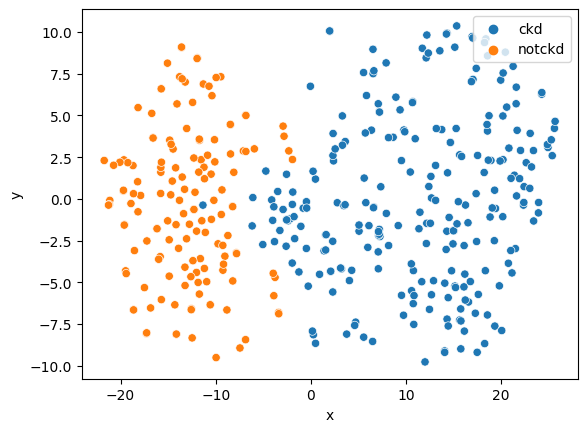

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=x_tsne["x"],
        y=x_tsne["y"],
        hue=ans)
plt.legend(loc="upper right")

<Axes: xlabel='appet', ylabel='count'>

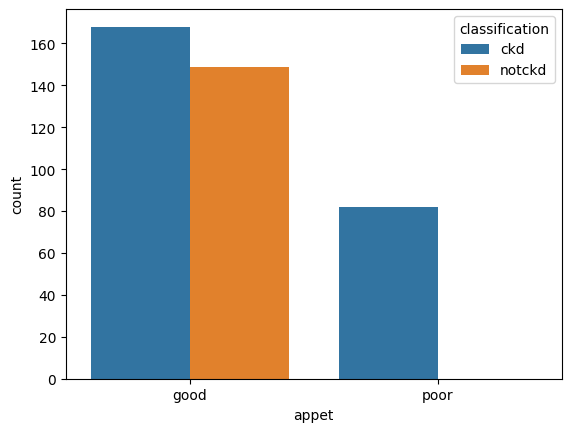

In [31]:
sns.countplot(x=df["appet"],
       hue=ans)